# Lagrange-Polynomials

References: 
- https://en.wikipedia.org/wiki/Lagrange_polynomial


Given a set of m points:
$(\phi_0, t_0), (\phi_1, t_1),..., (\phi_m, t_m)$.

The interpolation polynomial in the Lagrangian form is defined as
$$
L^m(t, \phi) = \sum_{i=0}^{m} \phi_i \cdot c_i(t) 
$$

with the Lagrangioan basis polynomial
$$
c_i(t) = \prod_{j=0, j\neq i}^{m} \frac{t-t_j}{t_i - t_j} 
$$

The derivative of a Lagrangian polynomial is defined through
$$
\frac{\partial L^m(t, \phi)}{\partial t} = \sum_{i=0}^{m} \phi_i \cdot \frac{\partial}{\partial t} c_i(t) 
$$

with
$$
\frac{\partial}{\partial t} c_i(t) 
= \sum_{j=0, j \neq i}^m \frac{1}{t_i - t_j} \prod_{k=0, k\neq i,j}^{m} \frac{t-t_k}{t_i - t_k} 
$$

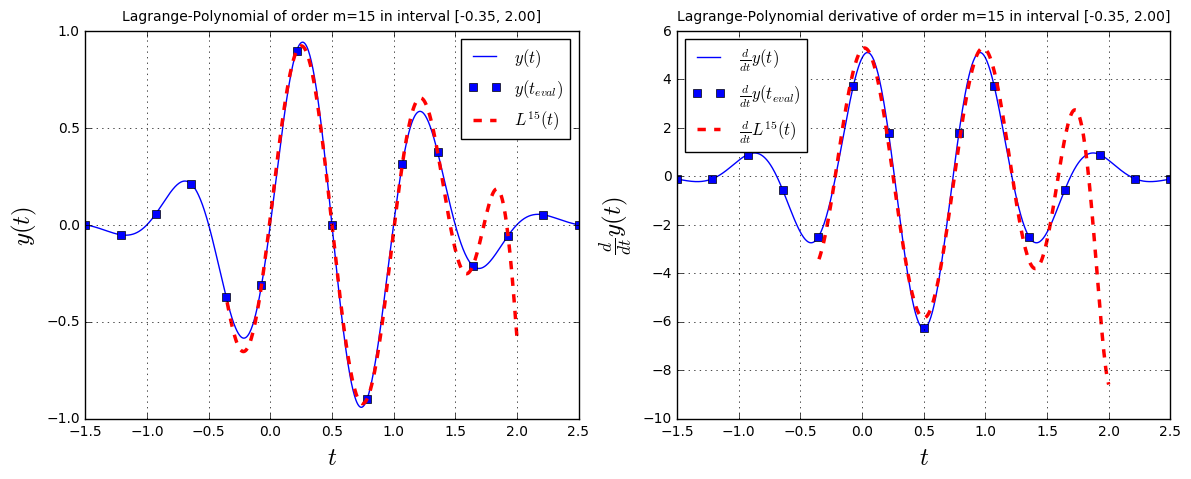

In [68]:
'''
------------------------------------------------------------------
Function: Function evaluates the Lagrangian polybasis c_i
          of grade m with substeps t at a given point t_eval 
          
------------------------------------------------------------------
'''
def polybasis(t_eval, t, i, j=None):
    t_i = t[i]
    m = len(t)
    c_j = np.ones(len(t_eval))
    for k in range(0, m):
        if (k == i):
            continue
        elif (k == j):
            continue
        else:
            c_j *= (t_eval - t[k]) / (t_i - t[k])
            
    return c_j

'''
------------------------------------------------------------------
Function: Function evaluates the Lagrangian polybasis derivative
          dc_i/dt
          of grade m with substeps t at a given point t_eval 
          
------------------------------------------------------------------
'''
def polybasis_ddt(t_eval, t, i):
    t_i = t[i]
    m = len(t)
    c_i = np.zeros(len(t_eval))
    for j in range(0, m):
        if (j == i):
            continue
        else:
            dt = 1.0 / (t_i - t[j])
            c_i +=  dt * polybasis(t_eval, t, i, j)
        
    return c_i

'''
------------------------------------------------------------------
Function: Function evaluates the Lagrangian polynomial at a given
          point t_eval
------------------------------------------------------------------
'''
def lagrange_polynomial(t_eval, t, phi):
    m = len(t)
    L = 0.0
    for i in range(0, m):
        L += polybasis(t_eval, t, i) * phi[i]
    return L


'''
------------------------------------------------------------------
Function: Function evaluates the derivative of a Lagrangian 
          polynomial at a given point t_eval
------------------------------------------------------------------
'''
def lagrange_polynomial_ddt(t_eval, t, phi):
    m = len(t)
    dL = 0.0
    for i in range(0, m):
        dL += polybasis_ddt(t_eval, t, i) * phi[i]
    return dL


'''================================================================
    Test functions with equidistant nodes
================================================================'''
import numpy as np
from matplotlib import pyplot as plt
y  = lambda t: np.sin(2. * np.pi * t) * np.exp(-(t-0.5)**2)
dy = lambda t: -2.0 * (t-0.5) * y(t) + 2.0*np.pi*np.cos(2. * np.pi * t) * np.exp(-(t-0.5)**2)

t_start = -1.5
t_end = 2.5
t = np.linspace(t_start, t_end, 1000)

m = 15
t_i  = np.linspace(t_start, t_end, m)
y_i  = y(t_i)
dy_i = dy(t_i)

# Compute lagrange polynomial at given points
[t_0, t_1] = [-0.35, 2.0]
m_eval = 300
t_eval = np.linspace(t_0, t_1, m_eval)
L_eval = lagrange_polynomial(t_eval, t_i, y_i)

# Compute lagrange derivative polynomial at given points
L_eval_ddt = lagrange_polynomial_ddt(t_eval, t_i, y_i)


# Create figure
# -----------------------------------------------------
fig = plt.figure()
fig.set_size_inches(14,5)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# Create y-plot
ax1.plot(t, y(t), ls='-', c='b', label=r'$y(t)$')
ax1.plot(t_i, y_i, ls='None', marker='s', mfc='b', label=r'$y(t_{eval})$')
ax1.plot(t_eval, L_eval, ls='--', lw=2.5,
         marker='None', c='r', label=r'$L^{%s}(t)$' %(m))

# Create dy/dt-plot
ax2.plot(t, dy(t), ls='-', c='b', label=r'$\frac{d}{dt}y(t)$')
ax2.plot(t_i, dy_i, ls='None', marker='s', mfc='b', label=r'$\frac{d}{dt}y(t_{eval})$')
ax2.plot(t_eval, L_eval_ddt, ls='--', lw=2.5,
         marker='None', c='r', label=r'$\frac{d}{dt}L^{%s}(t)$' %(m))

ax1.set_xlabel(r'$t$', fontsize=18)
ax1.set_ylabel(r'$y(t)$', fontsize=18)
ax1.set_title(r'Lagrange-Polynomial of order m=%d in interval [%.2f, %.2f]' % (m, t_0, t_1), fontsize=10, y=1.01)
ax1.grid(True)
ax1.legend(loc=0)

ax2.set_xlabel(r'$t$', fontsize=18)
ax2.set_ylabel(r'$\frac{d}{dt}y(t)$', fontsize=18)
ax2.set_title(r'Lagrange-Polynomial derivative of order m=%d in interval [%.2f, %.2f]' % (m, t_0, t_1), fontsize=10, y=1.01)
ax2.grid(True)
ax2.legend(loc=0)
plt.show()
            


# Gauss-Legendre-Quadrature

References:
- Fast and Accurate Computation of Gauss-Legendre and Gauss-Jacobi Quadrature Nodes and Weights, Nicholas Hale and Alex Townsend, OCCAM Preprint Number 12/79
- https://rosettacode.org/wiki/Numerical_integration/Gauss-Legendre_Quadrature
- http://mathworld.wolfram.com/RadauQuadrature.html


## General formulation
The integral of $f(x)$ is approximated over the interval $[-1,1]$ by a polynomial function $g(x)$ and a known weighting function $W(x)$.
$$
\int_{-1}^{1} f(x) dx = \int_{-1}^{1} W(x) g(x) dx
$$

Then $g(x)$ and $W(x)$ are approximated by a sum of function values at specified points $x_i$, multiplied by some weights $w_i$
$$
\int_{-1}^{1} W(x) g(x) dx \approx \sum_{i=1}^{n} w_i g(x_i)
$$

## Gauss-Legendre formulation
In the case o Gauss-Legendre formulation, the weighting function $W(x) = 1$, which leads to
$$
\int_{-1}^{1} f(x) dx \approx \sum_{i=1}^{n} w_i f(x_i)
$$

### How to obtain the weights $w_i$ and nodes $x_i$
The $n$ evaluation points $x_i$ for a n-point rule (called "nodes") ar roots of n-th order Legendre Polynomials $P_n(x)$.
These Legendre-Polynomials are defined through the following recursive rule:
$$
P_0(x) = 1
$$
$$
P_1(x) = x
$$
$$
n P_n(x) = (2n-1) x P_{n-1}(x) - (n-1) P_{n-2}(x)
$$

The recursive rule for the Legendre-polynom derivative is
$$
P_n'(x) = \frac{n}{x^2-1} (xP_n(x) - P_{n-1}(x))
$$


The roots can be computed numerically by the Newton-Raphson mathod:
$$
x_{i+1} = x_i - \frac{f(x_i)}{f'(x_i)}
$$

As first guess $x_0$ for the i-th root of a n-order polynomial $P_n$ choose
$$
x_0 = \cos\left(\pi \frac{i-\frac{1}{4}}{n+\frac{1}{2}} \right)
$$

After the determination of the nodes $x_i$, the weights can be approximated through
$$
w_i = \frac{2}{\left(1-x_i^2\right) \left[P_n'(x_i)\right]^2}
$$

Finally after obtaining nodes $x_i$ and weights $w_i$, it is possible to approximate the integral of a function
$f(x)$ over the interval $[a,b]$ by
$$
\int_{a}^{b} f(x) dx \approx \frac{b-a}{2} \sum_{i=1}^{n} w_i f(t_i)
$$ 
with
$$
t_i = \frac{b-a}{2} x_i + \frac{a+b}{2}
$$

## Gauss-Radau formulation
Gauss-Radau is a variation on the Gauss-Legendre quadarature rule, where the first the endpoint of the interval is also used. 

The Gauss-Radau  nodes $x_i$ satisfy for $i=1,..., n$
$$
\frac{P_{n-1} (x_i) + P_n(x_i)}{1+x_i} = 0
$$

and the weights $w_i$ satisfy for $i = 1,...,n-1$
$$ 
w_i = \frac{1}{(1-x_i)\left[P_{n-1}'(x_i)\right]^2}
$$
and for $i=n$
$$
w_i = \frac{2}{n^2}
$$

The roots can also be found using Newton-Raphson method:
$$
x_{i+1} = x_i - \frac{f(x_i)}{f'(x_i)}
$$
Hereby $f(x_i)$ is defined as 
$$
f(x_i) = \frac{P_{n-1} (x_i) + P_n(x_i)}{1+x_i}
$$
and $f'(x_i)$ is defined as
$$
f'(x_i) = \frac{P'_{n-1} (x_i) + P'_n(x_i)}{1+x_i} - \frac{P_{n-1} (x_i) + P_n(x_i)}{(1+x_i)^{1/2}} 
$$

## Gauss-Lobatto Formulation

The Gauss-Lobatto nodes $x_i$ satisfy for $i=1,..., n$
$$
\frac{x_n P_{n-1} (x_i) - P_n(x_i)}{1-x_i^2} = 0
$$

and the weights $w_i$ satisfy for $i = 2,...,n-1$
$$ 
w_i = \frac{2}{n(n-1)\left[P_{n-1}(x_i)\right]^2}
$$
and for $i=1,n$
$$
w_i = \frac{2}{n(n-1)}
$$


## Integration through Gauss-Quadrature on arbitrary interval $[a,b]$
For nodes $x_i \in [-1,1]$ and the corresponding weights $w_i$, it is possible to approximate the integral of a function
$f(x)$ over the interval $[a,b]$ by
$$
\int_{a}^{b} f(x) dx \approx \frac{b-a}{2} \sum_{i=1}^{n} w_i f(t_i)
$$ 
with
$$
t_i = \frac{b-a}{2} x_i + \frac{a+b}{2}
$$

## Algorithm to compute roots and weights
1. Define recursive functions to compute Legendre polynomial $P_n(x_i)$ and Legendre polynomial derivative $P_n'(x_i)$
2. Compute first guess of root $x_i$ 
3. Perform Newtpn-Raphson-Iterations for respective root-function until certain limit is reached
4. Compute weight for respective roots





In [2]:
import numpy as np

'''
------------------------------------------------------------------
Function: Evaluates the Legendre-Polynom P_n(x) of order n
          at point x
------------------------------------------------------------------
'''
def Legendre(n,x):
    x=np.array(x)
    if (n==0):
        return 1.0
    elif (n==1):
        return x
    else:
        return ((2.0*n-1.0)*x*Legendre(n-1,x)-(n-1)*Legendre(n-2,x))/n
    
    
'''
------------------------------------------------------------------
Function: Evaluates the derivative of the Legendre-Polynom P_n(x) 
          of order n at point x
------------------------------------------------------------------
'''
def DLegendre(n,x):
    x=np.array(x)
    if (n==0):
        return 0
    elif (n==1):
        return 1.0
    else:
        return (n/(x**2-1.0))*(x*Legendre(n,x)-Legendre(n-1,x))
    
    

'''
------------------------------------------------------------------
Function: Calcuate the Gauss-Legendre roots using 
          Newton-Raphson method
------------------------------------------------------------------
'''
def LegendreRoots(polyorder,tolerance=1e-20, iter_max=10000):
    roots = []
    if polyorder<2:
        return roots
    else:
        # The polynomials are alternately even and odd functions. So we evaluate only half the number of roots. 
        for i in range(1, int(int(polyorder) / 2) +1):
            x=np.cos(np.pi*(i-0.25)/(polyorder+0.5))
            error=10*tolerance
            iters=0
            while (error>tolerance) and (iters<iter_max):
                dx=-Legendre(polyorder,x) / DLegendre(polyorder,x)
                x=x+dx
                iters=iters+1
                error=abs(dx)
            roots.append(x)
        # Use symmetry to get the other roots
        roots=np.array(roots)
        if polyorder%2==0:
            roots=np.concatenate( (-1.0*roots, roots[::-1]) )
        else:
            roots=np.concatenate( (-1.0*roots, [0.0], roots[::-1]) )
        err=0 # successfully determined roots
    return roots


'''
------------------------------------------------------------------
Function: Calcuate the Gauss-Legendre weights w_i
------------------------------------------------------------------
'''
def GaussLegendreWeights(polyorder,tolerance=1e-20, iter_max=10000):
    W = []
    roots = LegendreRoots(polyorder,tolerance,iter_max)
    if (len(roots)>0):
        W = 2.0/( (1.0-roots**2)*(DLegendre(polyorder,roots)**2) )
    else:
        print("Error: Could not compute Gauss-Legendre weights")
        print("No roots available")
    return [W, roots]
    
    
'''
------------------------------------------------------------------
Function: Calcuate the Gauss-Radau roots using 
          Newton-Raphson method
------------------------------------------------------------------
'''
def RadauRoots(n, tolerance=1e-20, iter_max=10000):
    roots = []
    if n < 2:
        return roots # bad polyorder - no roots can be found
    else:
        
        # The remaining roots are computed through newtpn-raphson
        for i in range(1, n):
            x = np.cos(np.pi*(i-0.25)/(n+0.5))
            error = 10*tolerance
            iters = 0
            iiters = 0
            while (error>tolerance) and (iters<iter_max):
                while (1.+x < 0.0) and (iiters<1000):
                    x += 1. / (n-1)
                f    =  (Legendre(n-1,x) + Legendre(n,x)) / (1.+ x)
                df_1 =  (DLegendre(n-1,x) + DLegendre(n,x)) / (1.+ x)
                df_2 = -(Legendre(n-1,x) +  Legendre(n,x)) / (1.+ x)**0.5
                df = df_1 + df_2
                delta = -f / df
                x = x + delta
                iters=iters+1
                error=abs(delta)
            roots.append(x)
            if (iters>iter_max-1):
                print("Node %d: Stopped iteration before final accuracy." % i)
        
        # Last root is -1
        roots.append(-1)
        
    # Return roots in ascending order
    return roots[-1::-1]


'''
------------------------------------------------------------------
Function: Calcuate the Gauss-Radau weights w_i
------------------------------------------------------------------
'''
def GaussRadauWeights(n, tolerance=1e-20, iter_max=10000):
    w=[]
    roots = RadauRoots(n, tolerance=tolerance, iter_max=iter_max)
    if len(roots) > 0:
        for i, ri in enumerate(roots):
            if (i == 0):
                wi = 2. / (n*n)
            else:
                wi = 1.0 / ( (1.0 - ri) * DLegendre(n-1, ri)**2 )
            
            w.append(wi)
    else:
        print("Error: Could not compute Gauss-Radau weights")
        print("No roots available")
        
    return [w, roots]




'''
------------------------------------------------------------------
Function: Calcuate the Gauss-Lobatto roots using 
          Newton-Raphson method
------------------------------------------------------------------
'''
def LobattoRoots(n, tolerance=1e-20, iter_max=10000):
    roots = []
    if n < 2:
        return roots # bad polyorder - no roots can be found
    else:
        # First root is 1
        roots.append(1.0)
        
        # The remaining roots are computed through newton-raphson
        for i in range(1, n-1):
            x = np.cos(np.pi*(i-0.25)/(n+0.5))
            error = 10*tolerance
            iters = 0
            iiters = 0
            while (error>tolerance) and (iters<iter_max):
                while (1.+x < 0.0) and (iiters<1000):
                    x += 1. / (n-1)
                
                g  = x * Legendre(n-1,x) - Legendre(n,x)
                h  = 1. - x*x
                dg = x*DLegendre(n-1,x) + Legendre(n-1,x) - DLegendre(n,x)
                dh = -2. * x
                
                f = g / h
                df = (h*dg - g*dh) / (h*h)
                
                delta = -f / df
                x = x + delta
                iters=iters+1
                error=abs(delta)
                
            # Check if root is already in list
            for ri in roots:
                if ((x - ri) < tolerance * 10):
                    x *= -1
            roots.append(x)
            if (iters>iter_max-1):
                print("Node %d: Stopped iteration before final accuracy." % i)
        
        # Last root is -1
        roots.append(-1.0)
        
    # Return roots in ascending order
    return np.sort(roots)


'''
------------------------------------------------------------------
Function: Calcuate the Gauss-Lobatto weights w_i
------------------------------------------------------------------
'''
def GaussLobattoWeights(n, tolerance=1e-20, iter_max=10000):
    w=[]
    roots = LobattoRoots(n, tolerance=tolerance, iter_max=iter_max)
    if len(roots) > 0:
        for i, ri in enumerate(roots):
            if (i == 0 or i == len(roots)-1):
                wi = 2. / (n*(n-1))
            else:
                wi = 2.0 / ( n*(n-1) * Legendre(n-1, ri)**2 )
            
            w.append(wi)
    else:
        print("Error: Could not compute Gauss-Radau weights")
        print("No roots available")
        
    return [w, roots]


'''=========================================================================================
    Test of functions
========================================================================================='''
p = 3
[w_leg, x_leg] = GaussLegendreWeights(p, tolerance=1e-16, iter_max=10000)
[w_rad, x_rad] = GaussRadauWeights(p, tolerance=1e-16, iter_max=10000)
[w_lob, x_lob] = GaussLobattoWeights(p, tolerance=1e-16, iter_max=10000)
print("p=%d:\n--------" % p)
print("Legendre")
for i in range(0,p):
    print("xi=%f, wi=%f" % (x_leg[i], w_leg[i]))
    
print("Radau")
for i in range(0,p):
    print("xi=%f, wi=%f" % (x_rad[i], w_rad[i]))
    
print("Lobatto")
for i in range(0,p):
    print("xi=%f, wi=%f" % (x_lob[i], w_lob[i]))

p=3:
--------
Legendre
xi=-0.774597, wi=0.555556
xi=0.000000, wi=0.888889
xi=0.774597, wi=0.555556
Radau
xi=-1.000000, wi=0.222222
xi=-0.289898, wi=1.024972
xi=0.689898, wi=0.752806
Lobatto
xi=-1.000000, wi=0.333333
xi=-0.000000, wi=1.333333
xi=1.000000, wi=0.333333


# Spectral Deferred Correction Method for ODEs

Reference: F. Binkowski - On the convergence behaviour of spectral deferred correction methods for convection-diffusion euqations, ZIB Report 17-53 (November 2017)

## Derivation of SDC methods with Picard integral equation
The equation system is defined through
$$
\frac{d y(t)}{dt} = f(y(t))
$$

$$
y(0) = y_0
$$

with $t\in[0,\tau]$.
First, $t$ is divided into $n$ substeps:
$$
t_0 < t_1 < ... < t_n
$$

and an approximate solution to $y(t)$ is computed for each substep, e.g. using explicit euler discretization

$$
y_{i}^{[0]} = y_{i-1}^{[0]} + (t_{i}-t_{-1}) f(y_{i-1}^{[0]})
$$



The error of the approximate to the real solution is defined through

$$
\delta^{[0]}(t) = y(t) - y^{[0]}(t).
$$

The following differential equation can be derived for the error:

$$
\frac{d}{dt} \delta^{[0]}(t) = f\left(y^{[0]}(t)+\delta^{[0]}(t)\right) - \frac{d}{dt} y^{[0]}(t)
$$

$$ 
\delta^{[0]}(0) = 0
$$

with $t\in[0,\tau]$. This equation can be written as a Picard integral equation

$$
\delta^{[0]}(t) = \delta^{[0]}(0) + \int_{s=0}^{t} \left[ f(\left(y^{[0]}(s) + \delta^{[0]}(s)\right) -\frac{d}{ds} y^{[0]}(s) \right] ds
$$

which can be splitted into the subintervals $t_0 < t_1 < ... < t_n$:

$$
\delta^{[0]}(t_i) 
= \underbrace{\int_{s=0}^{t_{i-1}} \left[ f(\left(y^{[0]}(s) + \delta^{[0]}(s)\right) -\frac{d}{ds} y^{[0]}(s) \right] ds}_{= \delta^{[0]}(t_{i-1})}
+ 
\int_{s=t_{i-1}}^{t_{i}} \left[ f(\left(y^{[0]}(s) + \delta^{[0]}(s)\right) -\frac{d}{ds} y^{[0]}(s) \right] ds
$$

Rearranged, this formula can be written as

$$
\delta^{[0]}(t_i) = \delta^{[0]}(t_i-1) 
+ 
\int_{s=t_{i-1}}^{t_{i}} \left[ f(\left(y^{[0]}(s) + \delta^{[0]}(s)\right) -f\left(y^{[0]}(s)\right) \right] ds
+
\int_{s=t_{i-1}}^{t_{i}} f\left(y^{[0]}(s)\right) ds - \left(y^{[0]}(t_i) - y^{[0]}(t_{i-1})\right)
$$

The first integral is approximated with a simple numerical time stepping scheem of low order. For the second integral, a spectral integration is applied. Using an explicit discretization scheme, following equation for the error must be solved for $i=1,...,n$

$$
\delta_{i}^{[0]} = \delta_{i-1}^{[0]}
+
\tau_i \left[ f\left(y^{[0]}_{i-1} + \delta^{[0]}_{i-1} \right) - f\left(y^{[0]}_{i-1} \right) \right]
+
\tau_i \sum_{k=0}^{n} S_{ik} f\left(y_{k}^{[0]}\right) - \left(y_{i}^{[0]} - y_{i-1}^{[0]} \right)
$$

with $\tau_i = t_i - t_{i-1}$ and with $\delta_{0}^{[0]} = 0$.
Hereby the entries of the spectral integration matrix $\mathbf{S}$ are defined through

$$
S_{ik} = 
\begin{cases}
0, & \text{for } i=0 \\
\frac{1}{\tau_i} \int_{t_{i-1}}^{t_i} L_k(t) dt & \text{for } i > 0 \\
\end{cases}
$$

with $i,k = 0,...,n$, where $L_k(t)$ is a Lagrange basis polynomial

$$
L_k(t) = \prod_{j=0, j\neq k}^{n} \frac{t-t_j}{t_k-t_j}.
$$

For the intration of these Lagrange basis polynomials, the substep $\tau_i$ is further divided into $n$ sub-substeps $\xi_j$
The integral of these Lagrange basis polynomial is evaluated through pre-computed Gaussian quadratures at Lobatto nodes in between $[t_{i-1},t_i]$.

$$
\int_{t_{i-1}}^{t_i} L_k(t) dt \approx  \frac{\tau_i}{2} \sum_{j=0}^{n} w_j \cdot L_k(\xi_j)
$$
 
with
$$
\xi_j = \frac{\tau_i}{2} x_j + \frac{t_{i}+t_{i-1}}{2}
$$

with respective Lobatto nodes $x_j$ and weights $w_j$

After the computation of the error, the approximate solution is updated

$$
y^{[1]}_i = y^{[0]}_i + \delta^{[0]}_i
$$

## Spectral deferred correction method for one iteration
Consider following equation:

$$ 
\frac{\partial y }{\partial t} = f(t, y) = \lambda \cdot y(t) 
$$
$$
y(0) = y_0
$$

Analytic solution:
$$
y(t) = y_0 \cdot e^{\lambda t}
$$

Discretization through Euler explicit:
$$ 
\frac{\partial y }{\partial t} \approx \frac{y^{n+1} - y^{n}}{\Delta t}
$$


Full discretized equation:
$$
\frac{y^{n+1} - y^{n}}{\Delta t} = \lambda y^n
$$
$$
y^{n+1} = (1 + \Delta t \cdot \lambda) \cdot  y^n 
$$

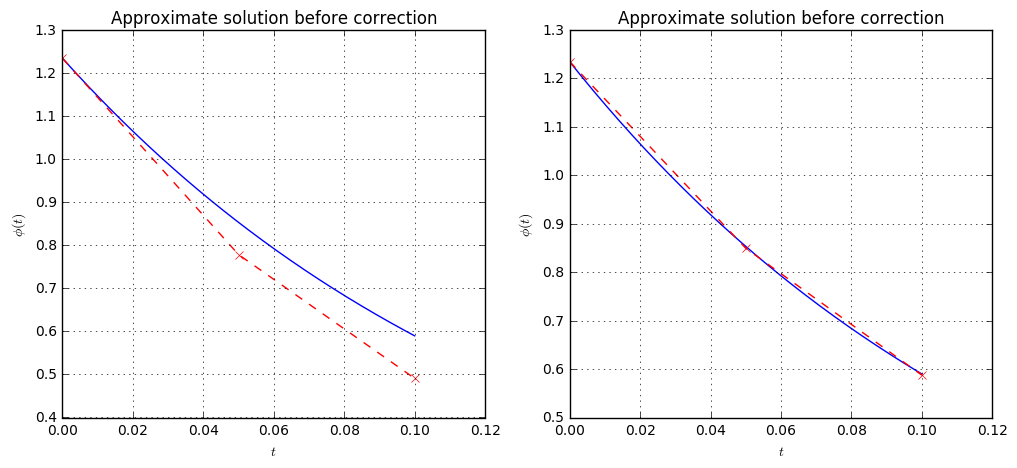

In [87]:
import numpy as np
from matplotlib import pyplot as plt


'''
=======================================================
Spectral deferred correction for one iteration step
=======================================================
'''
# Equation parameters
#------------------------------------------------------
lam = -np.exp(1)**2
y0  = 1.2345

# Flux function
def fluxFun(y):
    return lam*y

# Analytic solution
y_ana = lambda t: y0 * np.exp(lam*t)

# SDC parameters
#------------------------------------------------------
dt      = 0.1 # Timestep
n_sub   = 3   # Number of substeps
n_corr  = 2   # Number of corrections

y_aprx  = [0.0] * n_sub
e_aprx  = [0.0] * n_sub

# Split timestep into substeps at Lobatto nodes 
#------------------------------------------------------
[w_lob, x_lob] = GaussLobattoWeights(n_sub, 
                                     tolerance=1e-16, 
                                     iter_max=10000)
t_sub = []
for xi in x_lob:
    t_sub.append(0.5*dt*xi + 0.5*dt)

    
    
    
# Compute Spectral integration matrix S
#------------------------------------------------------
'''
Function to evaulate the Lagrange basis polynomial L_k(t)
'''
def LagrangeBasis(t_eval, t, k):
    n = len(t)
    L = 1.0
    tk = t[k]
    for i, ti in enumerate(t):
        if (i != k):
            L *= (t_eval-ti)/(tk-ti)
    return L

# spectral integration matrix S
S = []
for i in range(0, n_sub):
    S.append([])
    
    tau_i = t_sub[i] - t_sub[i-1]
    # Compute substeps of current substep
    t_susub = []
    for xi in x_lob:
        t_susub.append(0.5*tau_i*xi + 0.5*(t_sub[i] + t_sub[i-1]))
    
    # Evaluate basis polynomial integral 
    for k in range(0, n_sub):
        if (i == 0):
            S[-1].append(0.0)
        else: 
            L_int = 0.0
            for j, wi in enumerate(w_lob):
                L_int += wi * LagrangeBasis(t_susub[j], t_sub, k)
                
            S[-1].append(0.5*L_int)
     
    
            
# Compute approximate solution on substeps
#------------------------------------------------------
y_aprx[0] = y0
for i, ti in enumerate(t_sub):
    if (i>0):
        tau_i = t_sub[i] - t_sub[i-1]
        y_aprx[i] = y_aprx[i-1] + tau_i * fluxFun(y_aprx[i-1])
        
        
# Plot approximate solution on substeps
#------------------------------------------------------
t_ana = np.linspace(0, dt, 200)
fig1 = plt.figure()
fig1.set_size_inches(12,5)

ax11 = fig1.add_subplot(121)
ax11.plot(t_ana, y_ana(t_ana), 
          ls='-', c='b')
ax11.plot(t_sub, y_aprx, 
          ls='--', c='r', marker='x')

ax11.set_xlabel(r'$t$')
ax11.set_ylabel(r'$\phi(t)$')
ax11.set_title(r'Approximate solution before correction')
ax11.grid(True)


# Loop over error correction steps
#------------------------------------------------------
for j_corr in range(0, n_corr):
    # Compute errors on substeps
    #------------------------------------------------------
    e_aprx[0] = 0.0
    for i, ti in enumerate(t_sub):
        if (i>0):
            tau_i = t_sub[i] - t_sub[i-1]
            dF = fluxFun(y_aprx[i-1] + e_aprx[i-1]) - fluxFun(y_aprx[i-1])
            dE = 0.0
            for k in range(0, n_sub):
                dE += S[i][k] * fluxFun(y_aprx[k])
            e_aprx[i] = e_aprx[i-1] + tau_i * (dF + dE) - (y_aprx[i] - y_aprx[i-1])

    # Correction of approximate solution
    #------------------------------------------------------
    for i in range(0, n_sub):
        y_aprx[i] += e_aprx[i]
        
        
        


# Plot approximate solution after correction
#------------------------------------------------------
ax12 = fig1.add_subplot(122)
ax12.plot(t_ana, y_ana(t_ana), 
          ls='-', c='b')
ax12.plot(t_sub, y_aprx, 
          ls='--', c='r', marker='x')

ax12.set_xlabel(r'$t$')
ax12.set_ylabel(r'$\phi(t)$')
ax12.set_title(r'Approximate solution before correction')
ax12.grid(True)
plt.show()

## Spectral deferred correction for multiple iterations


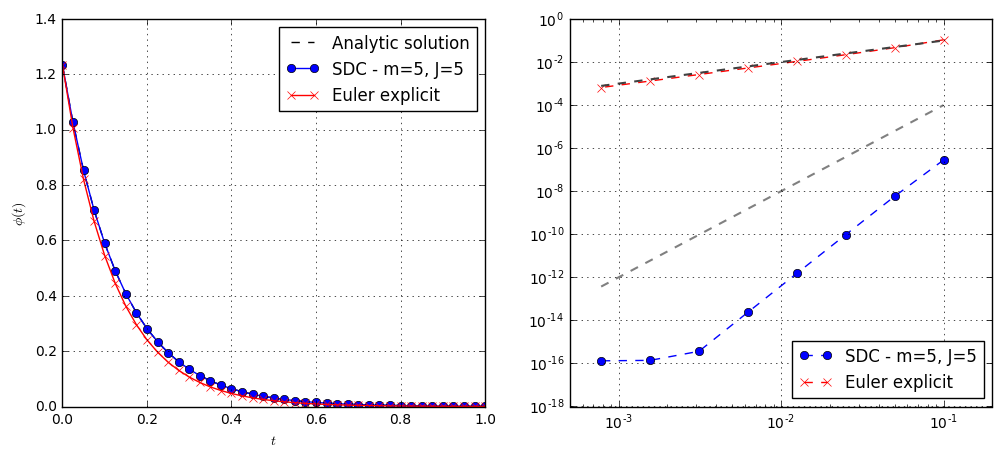

In [17]:
import numpy as np
from matplotlib import pyplot as plt

'''
---------------------------------------------------------
Function to calculate a straight log-line
in log-log-space of a given slope.

    Arguments:
    -----------
    x0: tuple (xmin,xmax) of x-axis limits
    order: slope of line
    Px: x-coordinat of origin
    Py: y-coordinat of origin

    Returns:
    ----------
    x: x-coordinates of line
    y: y-coordinates of line
    txt_x: x-coordinate for additional text
    txt_y: y-coordinate for additional text
---------------------------------------------------------
'''
def get_idealLogLine(x0, order, Px, Py, txtFacX=.15, txtFacY=.25):
    x = np.linspace(x0[0], x0[1], 1000)
    A = np.log(Py) - order * np.log(Px)
    y = (x**order) * np.exp(A)
    txt_x = (x0[1]+x0[0])*txtFacX
    txt_y = (txt_x**(order)) * np.exp(A-txtFacY)
    return x, y, txt_x, txt_y


'''-------------------------------------------------------
Function to evaulate the Lagrange basis polynomial L_k(t)
-------------------------------------------------------'''
def LagrangeBasis(t_eval, t, k):
    n = len(t)
    L = 1.0
    tk = t[k]
    for i, ti in enumerate(t):
        if (i != k):
            L *= (t_eval-ti)/(tk-ti)
    return L



'''-------------------------------------------------------
Function: Perform euler explicit simulation
-------------------------------------------------------'''
def EulerExplicit(y0, fluxFun, **kwargs):
    # Simulation parameters
    #------------------------------------------------------
    Tsim     = kwargs.get('Tsim', 1.0)  # Simulation time
    dt       = kwargs.get('dt', 0.1)    # Timestep
    Nt       = int(Tsim/dt)             # Number of timesteps

    y_sol    = [0.0] * (Nt + 1)
    y_sol[0] = y0
    t_sol    = [0.0] * (Nt + 1)

    for i in range(0, Nt):
        y_sol[i+1] = y_sol[i] + dt * fluxFun(y_sol[i])
        t_sol[i+1] = (i+1) * dt
        
    return [t_sol, y_sol]


'''-------------------------------------------------------
Function: Perform spectral deferred correction simulation
-------------------------------------------------------'''
def SpectralDeferredCorrection(y0, fluxFun, **kwargs):
    # Simulation parameters
    #------------------------------------------------------
    Tsim     = kwargs.get('Tsim', 1.0)  # Simulation time
    dt       = kwargs.get('dt', 0.1)    # Timestep
    n_sub    = kwargs.get('n_sub', 3)   # Number of substeps
    n_corr   = kwargs.get('n_corr', 2)  # Number of corrections
    Nt       = int(Tsim/dt)             # Number of timesteps

    y_aprx   = [0.0] * n_sub
    e_aprx   = [0.0] * n_sub

    y_sol    = [0.0] * (Nt + 1)
    y_sol[0] = y0
    t_sol    = [0.0] * (Nt + 1)


    #======================================================
    # Pre-computations
    #======================================================
    # Split timestep into substeps at Lobatto nodes 
    #------------------------------------------------------
    [w_lob, x_lob] = GaussLobattoWeights(n_sub, 
                                         tolerance=1e-16, 
                                         iter_max=10000)
    t_sub = []
    for xi in x_lob:
        t_sub.append(0.5*dt*xi + 0.5*dt)

    # Construct spectral integration matrix S
    #------------------------------------------------------
    S = []
    for i in range(0, n_sub):
        S.append([])

        tau_i = t_sub[i] - t_sub[i-1]
        # Compute substeps of current substep
        t_susub = []
        for xi in x_lob:
            t_susub.append(0.5*tau_i*xi + 0.5*(t_sub[i] + t_sub[i-1]))

        # Evaluate basis polynomial integral 
        for k in range(0, n_sub):
            if (i == 0):
                S[-1].append(0.0)
            else: 
                L_int = 0.0
                for j, wi in enumerate(w_lob):
                    L_int += wi * LagrangeBasis(t_susub[j], t_sub, k)

                S[-1].append(0.5*L_int)


    #======================================================
    # Solution procedure
    #======================================================
    # Start time loop
    #------------------------------------------------------
    for n_dt in range(0, Nt):

        # Initial first substep solution from last timestep
        #---------------------------------------------------
        y_aprx[0] = y_sol[n_dt]
        
        
        # Compute approximate solution on substeps
        #----------------------------------------
        for i in range(1,len(t_sub)):
            # Compute sub-timestep
            #----------------------------------------
            tau_i = t_sub[i] - t_sub[i-1]
            y_aprx[i] = y_aprx[i-1] + tau_i * fluxFun(y_aprx[i-1])

        
        # Loop over error correction steps
        #---------------------------------------------------
        for j_corr in range(0, n_corr):
            e_aprx[0] = 0.0
            
            for i in range(1, n_sub):
                # Compute sub-timestep
                #----------------------------------------
                tau_i = t_sub[i] - t_sub[i-1]

                # Compute errors on substeps
                #-----------------------------------------------
                dF = fluxFun(y_aprx[i-1] + e_aprx[i-1]) - fluxFun(y_aprx[i-1])
                dE = 0.0
                for k in range(0, n_sub):
                    dE += S[i][k] * fluxFun(y_aprx[k])
                e_aprx[i] = e_aprx[i-1] + tau_i * (dF + dE) - (y_aprx[i] - y_aprx[i-1])

            # Correction of approximate solution
            #------------------------------------------------------
            for i in range(0, n_sub):
                y_aprx[i] += e_aprx[i]

        # Update solution array
        #---------------------------------------------------
        y_sol[n_dt+1] = y_aprx[-1]
        t_sol[n_dt+1] = (n_dt+1) * dt 
        
    
    return [t_sol, y_sol]


'''
=======================================================
Calculate solution with different methods
=======================================================
'''
# Equation parameters
#------------------------------------------------------
lam  = -np.exp(1)**2
y0   = 1.2345
Tsim = 1.0
dt = [0.1, 0.05, 0.025, 0.0125, 0.00625, 0.003125, 0.0015625, 0.00078125]
n_corr = 5
n_sub = 5

# Flux function
def fluxFun(y):
    return lam*y

# Analytic solution
y_ana = lambda t: y0 * np.exp(lam*t)




# Numerical solutions
#------------------------------------------------------
[t_SDC, y_SDC, err_SDC] = [[], [], []]
[t_eul, y_eul, err_eul] = [[], [], []]
[t_ana, y_ana] = [[], []]

for i, dti in enumerate(dt):
    [t_SDCi, y_SDCi] = SpectralDeferredCorrection(y0, fluxFun, 
                                                  dt=dti, Tsim=Tsim, 
                                                  n_sub=n_sub, 
                                                  n_corr=n_corr)

    [t_euli, y_euli] = EulerExplicit(y0, fluxFun,
                                     dt=dti, Tsim=Tsim)

    [t_anai, y_anai] = [t_SDCi, y0 * np.exp(lam*np.array(t_SDCi))]
    
    # Compute L2-Error
    #--------------------------------------------------
    err_SDCi = np.sqrt(sum((y_SDCi-y_anai)**2) / len(y_SDCi))
    err_euli = np.sqrt(sum((y_euli-y_anai)**2) / len(y_euli))
    
    # Append data
    #--------------------------------------------------
    t_SDC.append(t_SDCi)
    t_eul.append(t_euli)
    t_ana.append(t_anai)
    y_SDC.append(y_SDCi)
    y_eul.append(y_euli)
    y_ana.append(y_anai)
    err_SDC.append(err_SDCi)
    err_eul.append(err_euli)
    
# Plot solution
#------------------------------------------------------
fig1 = plt.figure()
fig1.set_size_inches(12,5)

ax11 = fig1.add_subplot(121)
i_dt = 2
plt_ana, = ax11.plot(t_ana[i_dt], y_ana[i_dt], 
                     ls='--', c='k', 
                     label='Analytic solution')
plt_SDC, = ax11.plot(t_SDC[i_dt], y_SDC[i_dt], 
                     ls='-', c='b', marker='o',
                     label=r'SDC - m=%d, J=%d' % (n_sub, n_corr))
plt_eul, = ax11.plot(t_eul[i_dt], y_eul[i_dt], 
                     ls='-', c='r', marker='x',
                     label='Euler explicit')


legend11 = ax11.legend(handles=[plt_ana, plt_SDC, plt_eul], loc=0)

ax11.set_xlabel(r'$t$')
ax11.set_ylabel(r'$\phi(t)$')
ax11.set_title(r'')
ax11.grid(True)


# Plot error
#------------------------------------------------------
ax12 = fig1.add_subplot(122)
errPlot_SDC, = ax12.plot(dt, err_SDC,
                         ls='--', c='b', marker='o', 
                         label=r'SDC - m=%d, J=%d' % (n_sub, n_corr))
errPlot_EEX, = ax12.plot(dt, err_eul,
                         ls='--', c='r', marker='x',
                         label='Euler explicit')

# Plot ideal log line
x_N1, y_N1, txt_N1x, txt_N1y = get_idealLogLine([dt[-1], dt[0]], 1, 1.0, 1.0)
x_N2, y_N2, txt_N2x, txt_N2y = get_idealLogLine([dt[-1], dt[0]], 5, 1.0, 1.0)
N1 = ax12.plot(x_N1, y_N1, color=[.25,.25,.25], marker='None', ls='--', lw=1.5)
N2 = ax12.plot(x_N2, y_N2, color=[.5,.5,.5], marker='None', ls='--', lw=1.5)

ax12.set_xscale('log')
ax12.set_yscale('log')
ax12.set_xlim([5e-4, 2e-1])
ax12.set_ylim([1e-18, 1e0])
ax12.grid(True)

legend12 = ax12.legend(handles=[errPlot_SDC, errPlot_EEX], loc=0)

plt.show()


In [ ]:
0.003125 / 2

In [133]:
0.0015625 / 2

0.00078125